In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [94]:
train=pd.read_csv("titanic.csv")
train.head()

,Passenger,surrvied,Pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
train.isnull().head()

,Passenger,surrvied,Pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


<AxesSubplot:>

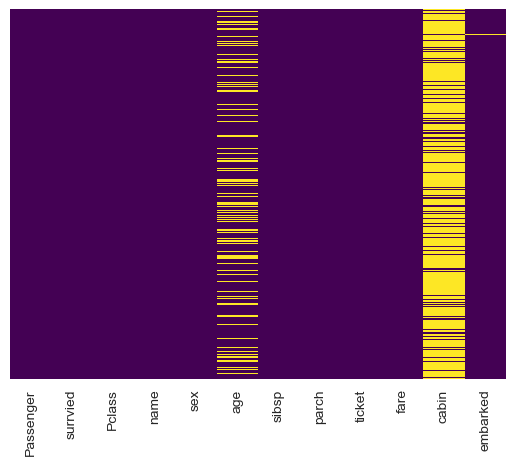

In [96]:
 sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='surrvied', ylabel='count'>

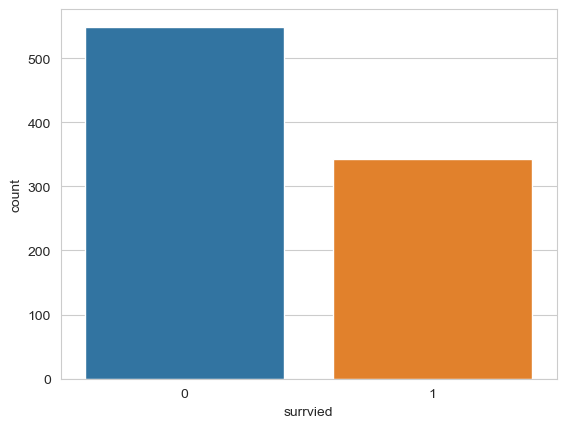

In [97]:
sns.set_style('whitegrid')
sns.countplot(x='surrvied',data=train)

<AxesSubplot:xlabel='surrvied', ylabel='count'>

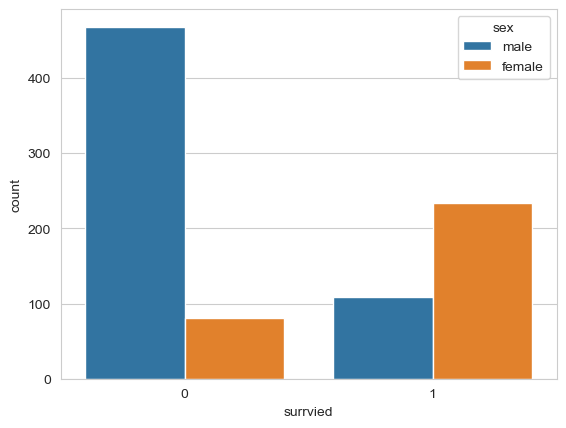

In [98]:
sns.set_style('whitegrid')
sns.countplot(x='surrvied',hue='sex',data=train)

<AxesSubplot:xlabel='surrvied', ylabel='count'>

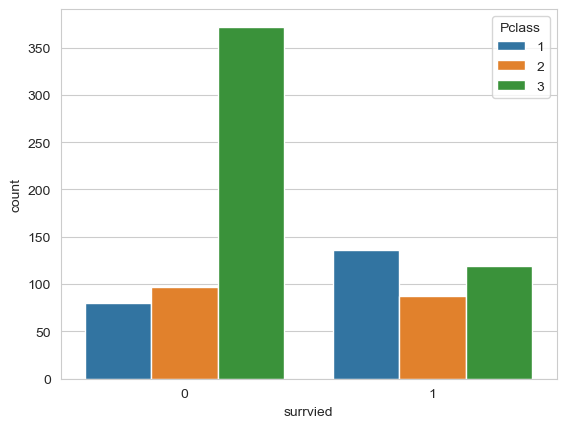

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='surrvied',hue='Pclass',data=train)

<AxesSubplot:>

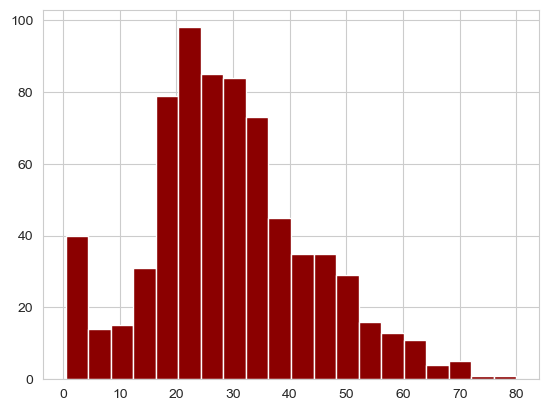

In [100]:
train['age'].hist(bins=20,color='darkred',alpha=1)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

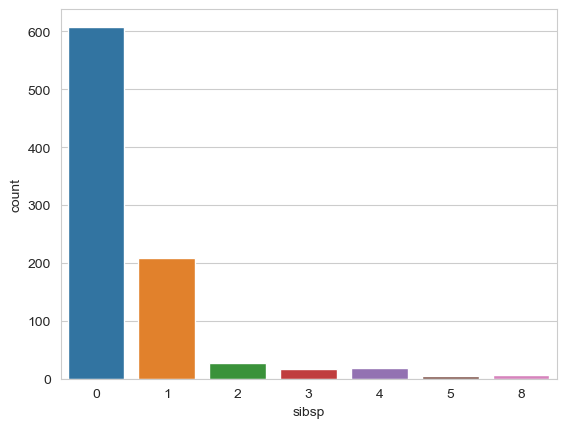

In [101]:
sns.countplot(x='sibsp' ,data=train)

<AxesSubplot:>

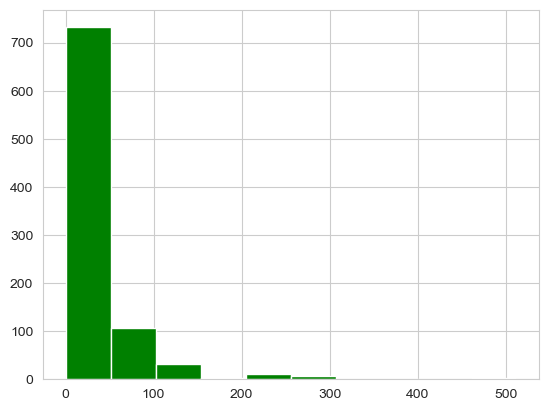

In [102]:
train['fare'].hist(color='green')

<AxesSubplot:xlabel='Pclass', ylabel='age'>

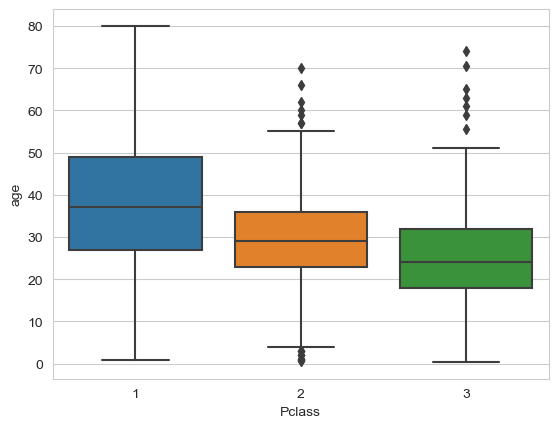

In [103]:
sns.boxplot(x='Pclass' , y='age',data=train)

In [104]:
def input_age(cols):
    age=cols[0] 
    Pclass=cols[1]
    
    if pd.isnull(age):
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [105]:
train['age']=train[['age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

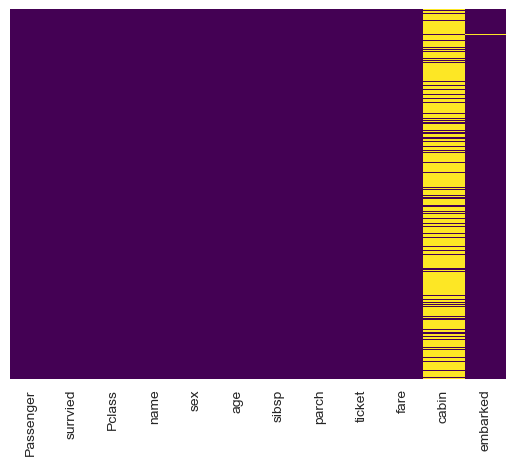

In [106]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [107]:
train.head()

,Passenger,surrvied,Pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
inputs_=train.drop(['Passenger','name','sibsp','parch','ticket','cabin','embarked','fare'],axis='columns')

In [109]:
target=train[['Passenger','name','sibsp','parch','ticket','cabin','embarked','fare']]

In [110]:
inputs_

,surrvied,Pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,24.0
889,1,1,male,26.0


In [123]:
target=inputs_['surrvied']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: surrvied, Length: 891, dtype: int64

In [111]:
last=inputs_.drop('surrvied',axis='columns')


,Pclass,sex,age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,24.0
889,1,male,26.0


In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
le_sex=LabelEncoder()

In [116]:
last['sex_n']=le_sex.fit_transform(last['sex'])

In [117]:
last

,Pclass,sex,age,sex_n
0,3,male,22.0,1
1,1,female,38.0,0
2,3,female,26.0,0
3,1,female,35.0,0
4,3,male,35.0,1
...,...,...,...,...
886,2,male,27.0,1
887,1,female,19.0,0
888,3,female,24.0,0
889,1,male,26.0,1


In [120]:
inputs_n=last.drop('sex',axis='columns')
inputs_n

,Pclass,age,sex_n
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
...,...,...,...
886,2,27.0,1
887,1,19.0,0
888,3,24.0,0
889,1,26.0,1


In [121]:
from sklearn import tree

In [122]:
model=tree.DecisionTreeClassifier()

In [124]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [125]:
 model.score(inputs_n,target)

0.8799102132435466

In [127]:
model.predict([[3,23,1]])

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)